# OrderReservoir api

Import DAna packages:

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
    
from dana.reservoir import OrdersReservoir

Connect to databases. You should have a local MongoDB running and you should have done the `quickstart_0_setup` steps before.

In [2]:
reservoir = OrdersReservoir(engine_url='mongodb://localhost:27017/', db_name='orders_example')

#### get_orders

Get the orders in the db applying the filters below.

Input:

* `symbol_list=None`: list of symbols to include, if `None` does not apply
* `mgr_list=None`: list of mgr codes to include, if `None` does not apply
* `bkr_list=None`: list of bkr codes to include, if `None` does not apply
* `date_list=None`: list of dates to include, if `None` does not apply
* `sign=None`: int, sign to include, if `None` does not apply
* `start_inf=None`: int, exclude orders with starting minute inferior to `start_inf`, if `None` does not apply
* `start_sup=None`: int, exclude orders with starting minute superior to `start_sup`, if `None` does not apply
* `end_inf=None`: int, exclude orders with ending minute inferior to `end_inf`, if `None` does not apply
* `end_sup=None`: int, exclude orders with ending minute superior to `ens_sup`, if `None` does not apply
* `duration_ph_inf=None`: int, exclude orders with duration in physical time inferior to `duration_ph_inf`, if `None` does not apply
* `duration_ph_sup=None`: int, exculde orders with duration in physical time superior to `duration_ph_sup`, if `None` does not apply
* `duration_vol_inf=None`: double, exclude orders with duration in volume time inferior to `duration_vol_inf`, if `None` does not apply 
* `duration_vol_sup=None`: double, exclude orders with duration in volume time superior to `duration_vol_sup`, if `None` does not apply
* `prp_inf=None`: double, exclude orders with period participation rate inferior to `prp_inf`, if `None` does not apply
* `prp_sup=None`: double, exclude orders with period participation rate superior to `prp_sup`, if `None` does not apply
* `prd_inf=None`: double, exclude orders with daily participation rate inferior to `prd_inf`, if `None` does not apply
* `prd_sup=None`: double, exclude orders with daily participation rate superior to `prd_sup`, if `None` does not apply

Output:

pymongo cursor

In [3]:
cursor = reservoir.get_orders(symbol_list=['symbol_0'], date_list=[200000], duration_ph_inf=1, duration_ph_sup=10)
cursor[0]

{'_id': ObjectId('58c53a388ec2d9020834c2f8'),
 'bkr': 'bkr_test',
 'ci': {'available': True,
  'duration_vol': 0.05,
  'impact_co': 0.003042356605299523,
  'impact_vo': 0.009506292702666095,
  'impact_vv': 0.004152984163010992,
  'pr_day': 0.005,
  'pr_period': 0.1},
 'date': 200000,
 'duration_ph': 5,
 'mgr': 'mgr_test',
 'mi': {'available': True,
  'm_0': 0.0,
  'm_1': 0.006631302050553384,
  'm_2': 0.008553051212259149,
  'm_3': 0.008511925904422847,
  'm_4': 0.003042356605299523},
 'min_end': 191,
 'min_start': 186,
 'ntrades': 4,
 'price': 100.06094123848004,
 'sign': 1,
 'symbol': 'symbol_0',
 'volume': 50.0}

#### list_symbols

Distinct symbols present in the db.

Input:

* `mgr_list=None`: list of mgr codes to include, if `None` does not apply
* `bkr_list=None`: list of bkr codes to include, if `None` does not apply
* `date_list=None`: list of dates to include, if `None` does not apply

Output:

Sorted list of distinct symbols.

In [4]:
symbols = reservoir.list_symbols(date_list=[200000,200001])
symbols[0:5]

['symbol_0', 'symbol_1', 'symbol_2', 'symbol_3', 'symbol_4']

#### list_dates

Distinct dates present in the db.

Input:

* `symbol_list=None`: list of symbols to include, if `None` does not apply
* `mgr_list=None`: list of mgr codes to include, if `None` does not apply
* `bkr_list=None`: list of bkr codes to include, if `None` does not apply

Output:

Sorted list of distinct dates.

In [5]:
dates = reservoir.list_dates(symbol_list=['symbol_1'])
dates[0:5]

[200000, 200001, 200002, 200003, 200004]

#### bucketed_stats

Bucket the orders according to the value of a field `field_x`. For each bucket calculate the mean and the standard deviation of `field_x` and `field_y`.

Input:

* `field_x`: string, the independent variable, the bucketing is done on the values of this field
* `field_y`: string, the dependent variable
* `boundaries`: list, the boundary values of the bucketing
* same filter fields as in `get_orders`

Output:

Cursor of a list of dictionaries. Each dict contains the mean, the standard deviation and the count of the bucket.


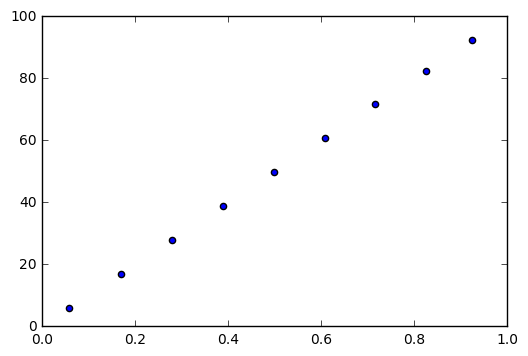

In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

b_stat = reservoir.bucketed_stats(field_x='ci.duration_vol', field_y='duration_ph', boundaries=list(np.linspace(0,1,10)))
b_stat = list(b_stat)

x = [i['m_x'] for i in b_stat]
y = [i['m_y'] for i in b_stat]
plt.scatter(x,y)
plt.show()

#### average_path

Average the mi paths for the orders of a given duration

Input:

* `duration`: int, the order duration
* same filter as `get_orders`, no `duration_ph` and `duration_vol` fields

Output:

Cursor of a list of dicts. The entries of the dict are the minute from the beginnin of the order and the corresponding average path. An extra item with key `nn` cotains the number of orders that contributed to the sample.

Numbers of orders contributing to the path: 191


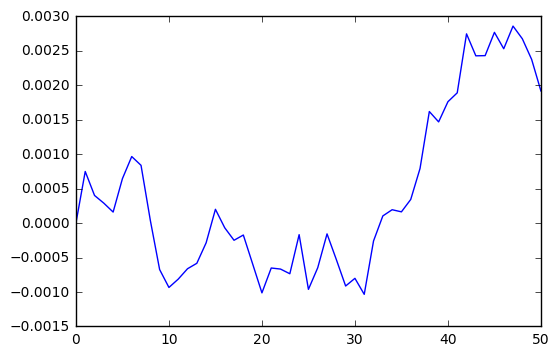

In [36]:
# define the duration of interest
duration = 51

# get the average path
cursor = reservoir.average_path(duration=duration)
path = list(cursor)[0]
print('Numbers of orders contributing to the path: ' + str(path['nn']))

# generate a plot of the path
x = list(range(duration))
y = [path[str(i)] for i in x]
plt.plot(x,y)
plt.show()